## Домашнее задание: Работа с переменными

Потренируем навыки, полученные на практическом занятии. Пользуясь новыми знаниями, проведите эксплоративный анализ данных на данных недвижимости Бостона, и попытайтесь обучить линейную модель наиболее качественно. Все ваши действия и решения описывайте в markdown.
Данные вы сможете получить исполнив следующий код:
from sklearn.datasets import load_boston
import pandas as pd
data = pd.read_csv(load_boston()[‘filename’], skiprows=1)
Переменная, которую надо предсказать - ’MEDV’.
Прочитать информацию о содержимом датасета:
print(load_boston()[‘DESCR’])
Если вы неудовлетворенны результатом, но лучшего решения предложить не можете, то высылайте задание на проверку.
Цель задания - закрепить полученные навыки.

In [73]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import seaborn as sns

In [16]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [60]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Что вижу: 

1. 506 строк 14 колонок
2. Явных пропусков нет и это уже хорошо.

In [ ]:
# Буду использовать линейную регрессию для того чтобы понять как хорошо или плохо сказываются изменения в данных
# на качестве работы моодели.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [67]:
def get_one_hot(X, cols):
    for each in cols:
        dummies = pd.get_dummies(X[each], prefix=each, drop_first=False)
        X = pd.concat([X, dummies], axis=1)
    return X.drop(columns=cols)

In [49]:
def get_score(ddaa):
    DATA_v = ddaa.drop('MEDV', axis=1)
    target_v = ddaa['MEDV']
    
    model = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(DATA_v, target_v, test_size=0.3, random_state=42)  
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [65]:
get_score(data)

0.7112260057484903

### Результат так себе. Начинаю работать с данными

In [17]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


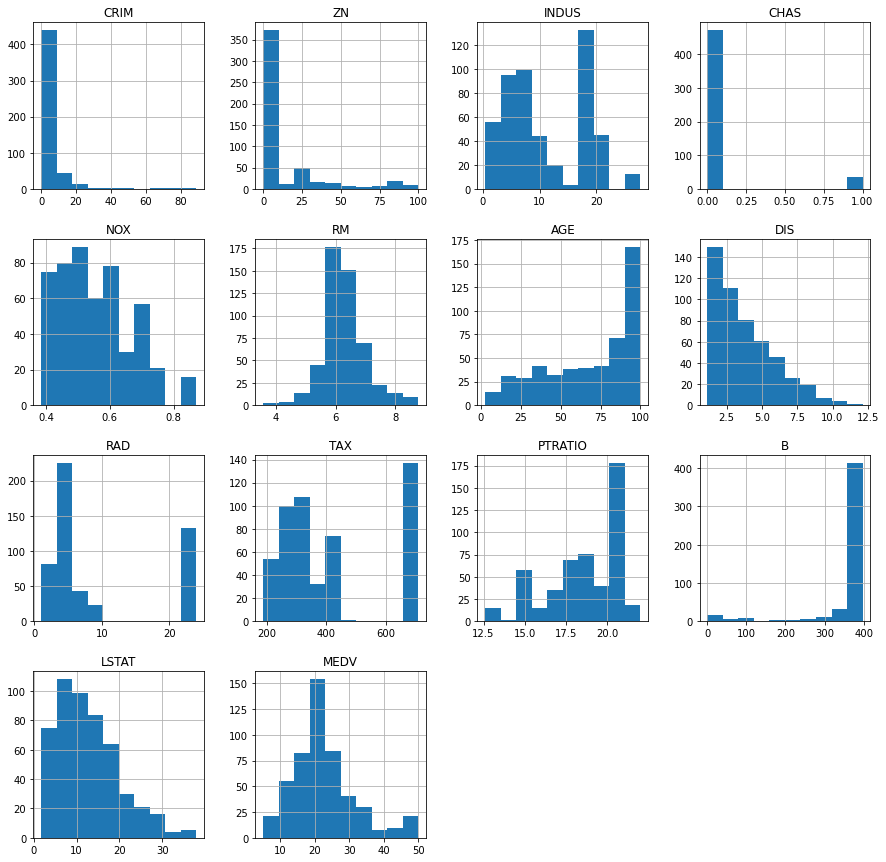

In [20]:
data.hist(figsize = (15,15))
plt.show()

In [25]:
# Столбец CHAS скорее всего категориальный
data['CHAS'].unique()

array([0, 1], dtype=int64)

Он состоит только из двух значений: 0 и 1.
Попробую для начала убрать этот столбец из обучения:

In [63]:
data1 = copy.copy(data)
data1.drop(columns=['CHAS'], inplace=True)
data1

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [64]:
get_score(data1)

0.7088141357902296

Результат ухудшился. Верну данные и попробую их преобразовать:  one-hot-encoding

In [69]:
data1 = copy.copy(data)
data1 = get_one_hot(data1,['CHAS'])
get_score(data1)

0.7112260057484934

С первоначальным результатом разницы ни какой: 0.7112260057484903

### Пробую изучать и менять другие данные
Явные вопросы вызывают столбцы: CRIM, ZN и B
Изучу их подробнее:

<AxesSubplot:xlabel='CRIM'>

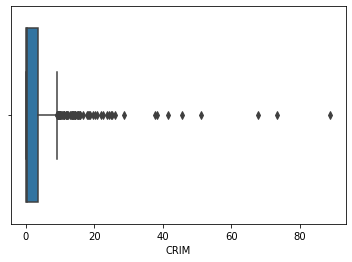

In [74]:
sns.boxplot(x=data['CRIM'])

In [76]:
data[data['CRIM']>60]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
380,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666,20.2,396.90,17.21,10.4
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0
418,73.5341,0.0,18.1,0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8


Буду считать три крайних значения выбросом и проведу обучение без этих начений:

In [80]:
data1 = copy.copy(data)
data1 = data[data['CRIM']<60]
get_score(data1)

0.7579405335724023

### Результат вырос и не плохо.

Попробую теперь выбросом считать не 3 резултата, а 8
Посмотрю что получиться:

In [81]:
data[data['CRIM']>30]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
380,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666,20.2,396.90,17.21,10.4
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
404,41.5292,0.0,18.1,0,0.693,5.531,85.4,1.6074,24,666,20.2,329.46,27.38,8.5
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0
410,51.1358,0.0,18.1,0,0.597,5.757,100.0,1.4130,24,666,20.2,2.60,10.11,15.0
414,45.7461,0.0,18.1,0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0
418,73.5341,0.0,18.1,0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8
427,37.6619,0.0,18.1,0,0.679,6.202,78.7,1.8629,24,666,20.2,18.82,14.52,10.9


In [82]:
data1 = copy.copy(data)
data1 = data[data['CRIM']<30]
get_score(data1)

0.715904949040572

С предыыдущим вариантом результат упал. Вернусь к предыдущему результату:

In [83]:
data1 = copy.copy(data)
data1 = data[data['CRIM']<60]
get_score(data1)

0.7579405335724023

### Теперь так же проверю остальные поля

<AxesSubplot:xlabel='ZN'>

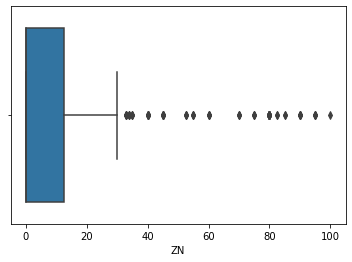

In [84]:
sns.boxplot(x=data['ZN'])

In [90]:
data[data['ZN']>90]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
57,0.01432,100.0,1.32,0,0.4110,6.816,40.5,8.3248,5,256,15.1,392.90,3.95,31.6
199,0.03150,95.0,1.47,0,0.4030,6.975,15.3,7.6534,3,402,17.0,396.90,4.56,34.9
200,0.01778,95.0,1.47,0,0.4030,7.135,13.9,7.6534,3,402,17.0,384.30,4.45,32.9
203,0.03510,95.0,2.68,0,0.4161,7.853,33.2,5.1180,4,224,14.7,392.78,3.81,48.5
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0


In [101]:
data2 = copy.copy(data1)
data2 = data1[data1['ZN']<90]
get_score(data2)

0.7629654752509337

### Удалось еще немного поднять score

Ну и посмотрю третий столбец:

<AxesSubplot:xlabel='B'>

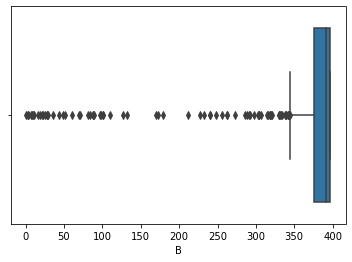

In [103]:
sns.boxplot(x=data['B'])

In [107]:
data[data['B']<50]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
410,51.13580,0.0,18.1,0,0.597,5.757,100.0,1.4130,24,666,20.2,2.60,10.11,15.0
411,14.05070,0.0,18.1,0,0.597,6.657,100.0,1.5275,24,666,20.2,35.05,21.22,17.2
412,18.81100,0.0,18.1,0,0.597,4.628,100.0,1.5539,24,666,20.2,28.79,34.37,17.9
415,18.08460,0.0,18.1,0,0.679,6.434,100.0,1.8347,24,666,20.2,27.25,29.05,7.2
416,10.83420,0.0,18.1,0,0.679,6.782,90.8,1.8195,24,666,20.2,21.57,25.79,7.5
418,73.53410,0.0,18.1,0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8
419,11.81230,0.0,18.1,0,0.718,6.824,76.5,1.7940,24,666,20.2,48.45,22.74,8.4
423,7.05042,0.0,18.1,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
424,8.79212,0.0,18.1,0,0.584,5.565,70.6,2.0635,24,666,20.2,3.65,17.16,11.7
425,15.86030,0.0,18.1,0,0.679,5.896,95.4,1.9096,24,666,20.2,7.68,24.39,8.3


In [113]:
data3 = copy.copy(data2)
data3 = data2[data2['B']>10]
get_score(data3)

0.7986537645886468

Ну, и в данном случае удалось еще разок приподнять score